# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [37]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [38]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [39]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [40]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [41]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [42]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [43]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [44]:
client = MongoClient(mongod_connect)
db = client.gp17 # use or create a database named demo
tweet_collection = db.Final_project #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [45]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [46]:
track = ['COVID-19'] # define the keywords, tweets contain election

locations = [32.31032842,-90.19378743,] #defin the location, in Jackson, Mississippi

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1336024294816686083
1336024294799773696
1336024296045473792
1336024296188211202
1336024296733499393
1336024297018626051
1336024297329012737
1336024297589141516
1336024299203858432
1336024299392548864
1336024302299254786
1336024302957826053
1336024303163195392
1336024303448563712
1336024303784038400
1336024303960281089
1336024303649820674
1336024303117234179
1336024303805009922
1336024304115478531
1336024304736153602
1336024305113714688
1336024305575059456
1336024305461829632
1336024305994399744
1336024307638673412
1336024308213288962
1336024308259414018
1336024308628533248
1336024309198819328
1336024309500960769
1336024309870059523
1336024310260051975
1336024310436139008
1336024311132422145
1336024311879053312
1336024312734609408
1336024312793329665
1336024312751386624
1336024312722034688
1336024312751431680
1336024312822677504
1336024312822652928
1336024312877252608
1336024312797523968
1336024312910733313
1336024312898187266
1336024312827011072
1336024313007247361
1336024313003032578


1336024474341273606
1336024474794274818
1336024476522254337
1336024477067522048
1336024477948391427
1336024478208282625
1336024478577549314
1336024478908727296
1336024479374471170
1336024479919603712
1336024480360124420
1336024480523685889
1336024480867639296
1336024480896970752
1336024480901173251
1336024480993464321
1336024481945575427
1336024482234986500
1336024482675380231
1336024482738286596
1336024483413553153
1336024483644096512
1336024484516651008
1336024485808529410
1336024485682688008
1336024485934358534
1336024485988683776
1336024486253113349
1336024486244741125
1336024487112945664
1336024487460999168
1336024487603605506
1336024488283156485
1336024488559960064
1336024490090774528
1336024491026165767
1336024490619363328
1336024491344896003
1336024491185598465
1336024491747647489
1336024491848249345
1336024492582330383
1336024493018542083
1336024493358247936
1336024494381670416
1336024495237324802
1336024494658490375
1336024496399134725
1336024496981954560
1336024497472811009


1336024691857747968
1336024692495413252
1336024692914671618
1336024693351051271
1336024693858590727
1336024692826763270
1336024693887918083
1336024694441566209
1336024694613549057
1336024695259492354
1336024695200751617
1336024695771172864
1336024696572145664
1336024697604104195
1336024697188753408
1336024698170306561
1336024699197939712
1336024701458546690
1336024701756379136
1336024701806645248
1336024702922403840
1336024702867943426
1336024703203471361
1336024703991951364
1336024704331747334
1336024705032187904
1336024705187319809
1336024705753624578
1336024706307272710
1336024706386956289
1336024706604994567
1336024706361806849
1336024706630230018
1336024706982400000
1336024707775205382
1336024708270133251
1336024708286963713
1336024708366487552
1336024710329606147
1336024710383947776
1336024710686121992
1336024711076130825
1336024711004704768
1336024711097163777
1336024711181033472
1336024711248171008
1336024711600496646
1336024712854507522
1336024713097867264
1336024713420738575


1336024906300071937
1336024906543161345
1336024906975371272
1336024909386928128
1336024910313914368
1336024910267871234
1336024911446302720
1336024911664590849
1336024912272617472
1336024912994193408
1336024913015046144
1336024913359097856
1336024913438797828
1336024914940276738
1336024914982268928
1336024916223639554
1336024916576116736
1336024916731236356
1336024916672602114
1336024916924100608
1336024917343674368
1336024917985251329
1336024918648102920
1336024919440826372
1336024919629565954
1336024919990124544
1336024920015261696
1336024920174829568
1336024920841662467
1336024921395302416
1336024921722511360
1336024921718226945
1336024922255020032
1336024922313920514
1336024922796269572
1336024922938880004
1336024923261857793
1336024923580608512
1336024925002297344
1336024925799321610
1336024925770014722
1336024926558556164
1336024926860480513
1336024926948614144
1336024927271575552
1336024926915072001
1336024927623897098
1336024927267291137
1336024928001331209
1336024928576036869


1336025105655271429
1336025106057998338
1336025106481639426
1336025107421143045
1336025107962220550
1336025108092219392
1336025107702161409
1336025108247425028
1336025108515749894
1336025109723746308
1336025109866352641
1336025110512349184
1336025110180933637
1336025110466228227
1336025110503895040
1336025113968463872
1336025113033121793
1336025114203353092
1336025114710847489
1336025115000098818
1336025115167870976
1336025115377758212
1336025115562303488
1336025116153700352
1336025116304678918
1336025117105790978
1336025117227421696
1336025117403602947
1336025118343114757
1336025118422695936
1336025118523289600
1336025118926135298
1336025118968074242
1336025119123189760
1336025120482205698
1336025120427667457
1336025120926732289
1336025121312534528
1336025121862070273
1336025122734370817
1336025122327592960
1336025123296571395
1336025123632128000
1336025123749552134
1336025125699850248
1336025125376897031
1336025126329065473
1336025126790443008
1336025126643658756
1336025126983254016


1336025307090923520
1336025307153887233
1336025307644645376
1336025307577524226
1336025307900305408
1336025307967582210
1336025309670477829
1336025309880201216
1336025310404497408
1336025310714880004
1336025311016783874
1336025311037829125
1336025312874860547
1336025313575272448
1336025314082820098
1336025314036736000
1336025314338672640
1336025314334367744
1336025314355503105
1336025314401660931
1336025314594496513
1336025314716225537
1336025315299176451
1336025315492114434
1336025315982905347
1336025316377161731
1336025316750450695
1336025316679028738
1336025316976943106
1336025317341683712
1336025317538983937
1336025318612733952
1336025318839242754
1336025319288004609
1336025319892000781
1336025320852512771
1336025320806371328
1336025321401950209
1336025322811080704
1336025322911899650
1336025323301974018
1336025323557818368
1336025324065345538
1336025323977191424
1336025324279181313
1336025324929359872
1336025325059321858
1336025325873082368
1336025326498041856
1336025326661427200


1336025518601363458
1336025518441979908
1336025518852935684
1336025519884627969
1336025520631406592
1336025519926743042
1336025520824324098
1336025521671573516
1336025521793232897
1336025522317512704
1336025522611105792
1336025523399507968
1336025523475128329
1336025524100063246
1336025524490043392
1336025524565659648
1336025525010182146
1336025526251745283
1336025527145156608
1336025528101265409
1336025528088862720
1336025527476490240
1336025528353124357
1336025528269221895
1336025529137287168
1336025529150017541
1336025529238089730
1336025529036763136
1336025530429186048
1336025531591110658
1336025531729539077
1336025532777996288
1336025533163970563
1336025533168164865
1336025535063973888
1336025535072202753
1336025536477458433
1336025537005883392
1336025537094053888
1336025538310311936
1336025539077959680
1336025539040202752
1336025540063449088
1336025540436713472
1336025540483047428
1336025541191872515
1336025541586132993
1336025542458560513
1336025543515496452
1336025543960092674


## Use the REST API to Collect Tweets

Authorize the REST API 

In [48]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [49]:
count = 100 #number of returned tweets, default and max is 100
geocode = "32.31032842,-90.19378743, 100 mi"  # defin the location, in Jackson, MI
q = "COVID-19"                               #define the keywords, tweets contain COVID-19

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [50]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

IndexError: list index out of range

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [51]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

NameError: name 'since_id_new' is not defined

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [52]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

1420
1350


Create a text index and print the Tweets containing specific keywords. 

In [18]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [30]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "COVID-19"}}) # return tweets contain covid-19

Use pprint to display tweets

In [31]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Jessica Trufant Powers
text: COVID-19 press conferences hit different when you have COVID-19 🥴
----
name: TopNotch Programmer
text: RT @JSTrufant: COVID-19 press conferences hit different when you have COVID-19 🥴
----
name: NOOB-SAIBOT 🏴‍☠️
text: @PESMasterRace Le Covid-19 est un virus en raison du Covid-19 🤔
----
name: Coronavirus update
text: RT @geoffreyyork: Sweden’s Covid-19 experiment is over. After a surge in Covid-19 infections led to rising hospitalizations and deaths, Swe…
----
name: Pauline Donovan
text: RT @ElonBachman: 2\ In North Dakota, 36% of COVID-19 hospitalizations are there for other reasons

39% of COVID-19 ICU patients are there f…
----
name: Dünyamız
text: RT @ZeydanKaralar01: Covid-19 pozitif hasta nakil aracı hizmetinizde

Covid-19 hastalarımızın evden hastaneye, hastaneden eve ulaşımlarını…
----
name: ibabnya lagi uas hehe
text: RT @GUGUDANGLOBAL_: [COVID-19 TEST NOTICE]

gugudan’s mina has taken a test for Covid-19 after celebrating her birthday wi

In [32]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "COVID-19"}}) # return tweets contain covid-19

Use pandas to display tweets

In [33]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,timestamp_ms,retweeted_status,display_text_range,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,possibly_sensitive,extended_entities
0,5fce765676eea84f5401887f,Mon Dec 07 18:37:05 +0000 2020,1336016899403034625,1336016899403034625,COVID-19 press conferences hit different when ...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1607366225468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fce765776eea84f5401888a,Mon Dec 07 18:37:06 +0000 2020,1336016902368481280,1336016902368481280,RT @JSTrufant: COVID-19 press conferences hit ...,"<a href=""https://go-shopal.herokuapp.com"" rel=...",False,NaN,None,NaN,...,1607366226175,{'created_at': 'Mon Dec 07 18:37:05 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fce776576eea84f5401927c,Mon Dec 07 18:41:35 +0000 2020,1336018033664520199,1336018033664520199,@PESMasterRace Le Covid-19 est un virus en rai...,"<a href=""http://twitter.com/download/iphone"" r...",False,1.336018e+18,1336017817968242692,1.031083e+18,...,1607366495897,NaN,"[15, 63]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fce777d76eea84f5401934d,Mon Dec 07 18:42:00 +0000 2020,1336018135930068995,1336018135930068995,RT @geoffreyyork: Sweden’s Covid-19 experiment...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,1607366520279,{'created_at': 'Sun Dec 06 20:18:00 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fce762476eea84f540186af,Mon Dec 07 18:36:14 +0000 2020,1336016687301341189,1336016687301341189,"RT @ElonBachman: 2\ In North Dakota, 36% of CO...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,1607366174899,{'created_at': 'Mon Dec 07 06:06:45 +0000 2020...,NaN,1.325122e+18,1325121825144270848,{'created_at': 'Sat Nov 07 17:03:57 +0000 2020...,"{'url': 'https://t.co/96LZpVFEnV', 'expanded':...",NaN,NaN,NaN
5,5fce77d976eea84f5401967f,Mon Dec 07 18:43:32 +0000 2020,1336018523173302273,1336018523173302273,RT @ZeydanKaralar01: Covid-19 pozitif hasta na...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1607366612605,{'created_at': 'Mon Dec 07 11:39:41 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fce77b176eea84f54019535,Mon Dec 07 18:42:52 +0000 2020,1336018353484271616,1336018353484271616,RT @GUGUDANGLOBAL_: [COVID-19 TEST NOTICE]\n\n...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,1607366572148,{'created_at': 'Mon Dec 07 08:30:32 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fce779976eea84f5401944c,Mon Dec 07 18:42:28 +0000 2020,1336018252590424065,1336018252590424065,"RT @kylegriffin1: ""Vice President-elect Kamala...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,1607366548093,{'created_at': 'Mon Dec 07 17:50:00 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fce778076eea84f54019371,Mon Dec 07 18:42:03 +0000 2020,1336018149012025351,1336018149012025351,RT @ZeydanKaralar01: Covid-19 pozitif hasta na...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1607366523398,{'created_at': 'Mon Dec 07 11:39:41 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fce776276eea84f54019257,Mon Dec 07 18:41:32 +0000 2020,1336018021123502087,1336018021123502087,"RT @kylegriffin1: ""Vice President-elect Kamala...","<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,1607366492907,{'created_at': 'Mon Dec 07 17:50:00 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


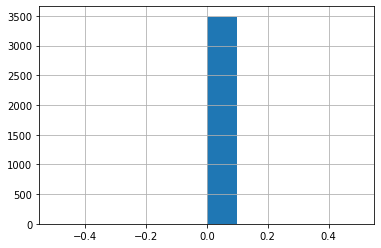

In [34]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count